In [1]:
import nltk
from nltk.corpus import brown
from nltk import TrigramTagger

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          labels,
                          cmap=plt.cm.BuPu):
    """
    This function plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    x_tick_marks = np.arange(len(labels))
    y_tick_marks = np.arange(len(labels))
    plt.xticks(x_tick_marks, labels, rotation=45)
    plt.yticks(y_tick_marks, labels)
    #
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [2]:
##########################################################
# Include your code to train Ngram taggers here
##########################################################


valscore = []
evalscore = []
gap = []

for domain in brown.categories():
    sentences = brown.tagged_sents(categories=domain, tagset="universal")
    valIndex = int(len(sentences) * .7)
    tstIndex = int(len(sentences) * .85)
    trSents = sentences[:valIndex]
    valSents = sentences[valIndex: tstIndex]
    tstSents = sentences[tstIndex:]

    default = nltk.DefaultTagger('NOUN')
    uni = nltk.UnigramTagger(trSents, backoff=default)
    bi = nltk.BigramTagger(trSents, backoff=uni)
    tri: TrigramTagger = nltk.TrigramTagger(trSents, backoff=bi)
    validation = tri.evaluate(valSents)
    evaluation = tri.evaluate(tstSents)
    valscore.append(validation)
    evalscore.append(evaluation)
    difference = abs(validation - evaluation)
    gap.append(difference)

In [3]:
print(f"Domain `{brown.categories()[evalscore.index(max(evalscore))]}` is the one with the best evaluation score {max(evalscore)}")
print(f"Domain `{brown.categories()[evalscore.index(min(evalscore))]}` is the one with the worst evaluation score {min(evalscore)}")
print(f"Domain `{brown.categories()[gap.index(max(gap))]}` major validation & test gap's score  {max(gap)}")

Domain `learned` is the one with the best evaluation score 0.9282358519029352
Domain `humor` is the one with the worst evaluation score 0.8335622710622711
Domain `science_fiction` major validation & test gap's score  0.05961170723443199


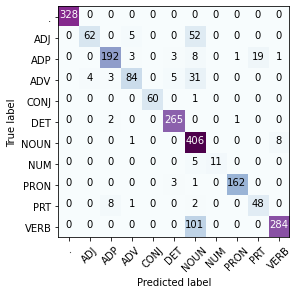

In [5]:

##########################################################
# Include your code to train Ngram taggers here
##########################################################

# convert test to the correct data format (a flat list of tags)
test_tags_combined = []
for sentence in tstSents:
    for word,tag in sentence:
        test_tags_combined.append(tag)

# remove the tags from the original test data and use tag_sents() to get the predictions from the final model

rawtest = []
for sentence in tstSents:
    onlywords = []
    for word,tag in sentence:
        onlywords.append(word)
    rawtest.append(onlywords)

predictions = tri.tag_sents(rawtest)

# convert the predictions to the correct data format (a flat list of predicted tags)
comb_tags = []
for sentence in predictions:
    for word,tag in sentence:
        comb_tags.append(tag)

# get a set of the labels (sorted(set(test)))
uniquelabels = (sorted(set(test_tags_combined)))

# create the confusion matrix and plot it using the plot_confusion_matrix function
result = confusion_matrix(test_tags_combined, comb_tags, labels = uniquelabels)
plot_confusion_matrix(result,labels=uniquelabels)